<a href="https://colab.research.google.com/github/tdack21/cosmologia_ml/blob/main/Tarea_8_cosmoml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 8. Cosmología con Machine Learning
Tonatiuh Sánchez Madrid

<ipython-input-7-6e306b5b0037>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mymap    = plt.cm.get_cmap('viridis')
<ipython-input-7-6e306b5b0037>:64: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 1 Axes> than <Figure size 700x500 with 2 Axes> which fig.colorbar is called on.
  cbar   = plt.colorbar(CS3, cax=cbaxes)


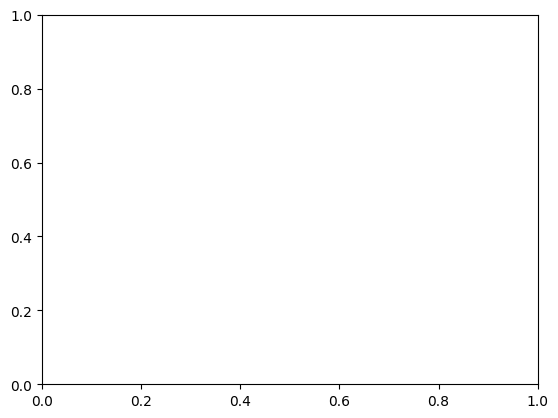

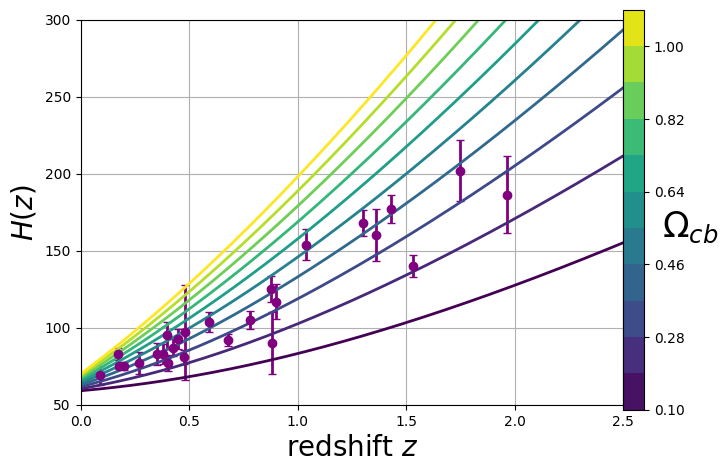

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parámetros iniciales
H0     = 0.7
Ocb    = 0.32
Ok     = 0.0
Omrad  = 0.0001
Ode    = 1 - Ocb - Ok
zvals  = np.linspace(0, 2.5, 300)

def hub(z, Ocb=0.32):
    # H**2/H0**2
    rhow = Ode
    return Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1-Ocb)*rhow

all_z  = []
all_hz = []
all_Ocb= []
for i in np.linspace(0.1, 1, 10):
    all_Ocb.append(i)
    all_z.append(np.linspace(0, 2.5, 300))
    all_hz.append([100*H0*hub(z, i)**0.5 for z in zvals])

a = np.array(all_Ocb)
min, max = (a.min(), a.max())
step     = (max-min)/len(a)

mymap    = plt.cm.get_cmap('viridis')
Z        = [[0,0],[0,0]]
levels   = np.arange(min, max+step, step)
CS3      = plt.contourf(Z, levels, cmap=mymap)

fig, ax1 = plt.subplots(figsize=(7.,5))
ax1.set_xlim(0, 2.5)
ax1.set_ylim(50, 300)
ax1.set_ylabel('$H(z)$', fontsize=20)
ax1.set_xlabel('redshift $z$', fontsize=20)
ax1.grid()

# Cargar datos observacionales
dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors/2., xerr=None,
             color='purple', marker='o', ls='None',
             elinewidth=2, capsize=3, capthick=1)

# Función de inicialización para la animación
def init():
    return []

# Función de animación
def animate(i):
    line, = ax1.plot(all_z[i], all_hz[i], color=mymap((all_Ocb[i]-min)/(max-min)), lw=2.)
    return [line]  # Devuelve una lista de objetos Artist

# Crear la animación
ani = animation.FuncAnimation(fig, animate, frames=len(all_Ocb), init_func=init, blit=True, interval=200)

# Añadir la barra de color
cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cbar   = plt.colorbar(CS3, cax=cbaxes)
cbar.set_label('$\Omega_{cb}$', rotation=0, fontsize=25)

HTML(ani.to_jshtml())